<a href="https://colab.research.google.com/github/git-ashiq/kaggle-titanic/blob/master/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**

#### **The Challenge:**

To build a predictive model for “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).














### **Steps:**

**Defining the Problem Statement**
*   Question or problem definition.

**Data Collection**
*   Collecting training and testing data.

**Exploratory Data Analysis**
*   Analyze, identify patterns, and explore the data.
  
**Feature Engineering**
*   Wrangle, prepare, cleanse the data.

**Modelling**
*   Model, predict and solve the problem.

**Testing**
*   Visualize, report, and present the problem solving steps and final solution

*   Supply or submit the results.

### **1. Defining the problem statement**

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we need to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Let us first learn about the structure of the Titanic ship.**

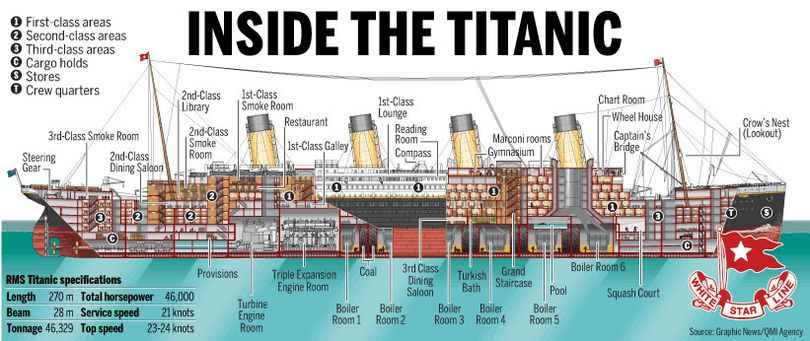

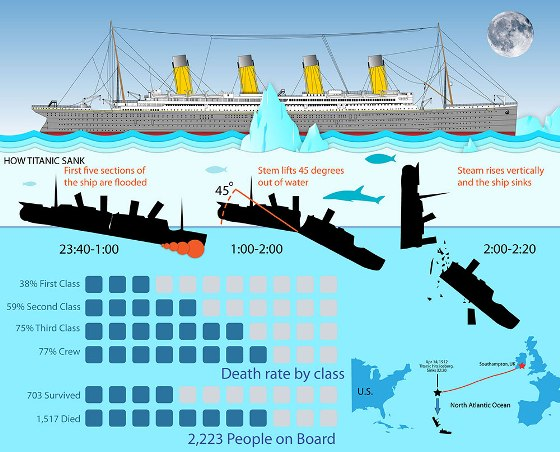

In [0]:
# To display the image in the notebook.
from IPython.display import Image, display
titanicship = ['https://i.pinimg.com/originals/74/ca/9e/74ca9e97625780b5d528a5f62110e1d8.jpg', 'http://www.infographicszone.com/wp-content/uploads/2012/10/the-RMS-titanic-1.jpg' ]

for ship in titanicship:
  display(Image(ship))
  print () 

## **2.Data Collection**

Collecting training and testing data from Kaggle.
you can download it from https://www.kaggle.com/c/titanic/data

### **2.1 Google Colaboratory and Kaggle datasets API setup**

FYI: https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8

In [0]:
# Install Kaggle library
!pip install kaggle 

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Download datasets for the Titanic challenge
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.6MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.69MB/s]


In [29]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


**load train, test dataset using Pandas**

In [0]:
# Import Pandas
import pandas as pd

# Copy the path from files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

## **3.Exploratory Data Analysis**
Analyze, identify patterns, and explore the data. 

### **3.1 Analyze by describing data**

In [31]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Data Dictionary**

Variable	Definition	Key survival	
*   Survived: 0 = No, 1 = Yes
*   Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
*   Name: Name of the passanger
*   Sex:	Sex	
*   Age: Age in years 
*   Sibsp:	# of siblings / spouses aboard the Titanic
*   Parch:	# of parents / children aboard the Titanic
*   Ticket:	Ticket number	
*   Fare:	Passenger fare
*   Cabin:	Cabin number
*   Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton







	
	


**Categorical features:**



In [0]:
train.shape

(891, 12)

In [0]:
test.shape

(418, 11)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
